# KUMO CODERPAD PROBLEM #3

**Problem 3:** Compare the Average Precision of Kumo predictions against a simple heuristic. The heuristic is P(user will visit in the next 28 days) = COUNT(days that the user visited in the past 28 days) / 28

Submission: Code to generate a table of fake “predictions” for each user ID, according to the above heuristic. The code should then calculate the Average Precision for both the Kumo predictions and the heuristic, so that we can compare the performance.


**Plan of Attack:**

1. Generate heuristic predictions: Calculate the probability of a user visiting in the next 28 days based on their past 28 days' visit count.

2. Calculate Average Precision: Compute the Average Precision for both the Kumo predictions and the heuristic predictions.

4. Compare the results: Generate a table and compare the performance of both models.

In [75]:
#Load necessary imports and packages
import pandas as pd
from sklearn.metrics import average_precision_score
from datetime import datetime, timedelta  #to calculate difference in dates
import matplotlib.pyplot as plt

Assuming you have uploaded the ML predictions & the cleaned session datasets, if not run the following cell.

In [47]:
!mkdir -p /content/kumo_data
%cd /content/kumo_data
from google.colab import files
uploaded = files.upload()

/content/kumo_data


Saving ecommerce-sessions_cleansed.csv to ecommerce-sessions_cleansed.csv
Saving ecommerce-visit-predictions.csv to ecommerce-visit-predictions.csv
Saving ecommerce-with_visit_labels.csv to ecommerce-with_visit_labels.csv


In [48]:
!pwd

/content/kumo_data


In [49]:
#Load the datasets in dataframes
df_sessions = pd.read_csv('/content/kumo_data/ecommerce-sessions_cleansed.csv')
df_kumo_predictions = pd.read_csv('/content/kumo_data/ecommerce-visit-predictions.csv')
df_labels = pd.read_csv('/content/kumo_data/ecommerce-with_visit_labels.csv')

In [50]:
#Check the columns names exist
print("Sessions DataFrame Columns:", df_sessions.columns)
print("Kumo Predictions DataFrame Columns:", df_kumo_predictions.columns)

Sessions DataFrame Columns: Index(['user_id', 'session_id', 'timestamp'], dtype='object')
Kumo Predictions DataFrame Columns: Index(['user_id,score'], dtype='object')


In [51]:
#Reuse function from Problem#2 to cleanup the predictions dataset and column names
def make_col_list(df):
  col = []

  for i in df.columns:
    r = str(i).strip('[]').split(',')
    for j in r:
      col.append(j)

    df = df[i].str.split(',', expand=True)

  df.columns = col
  return df

In [52]:
#Confirm the labels dataset is ready to use...
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     454 non-null    object
 1   start_date  454 non-null    object
 2   end_date    454 non-null    object
 3   label       454 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 14.3+ KB


In [53]:
#Confirm the prediction dataset is cleaned is ready to use...
df_kumo_predictions = make_col_list(df_kumo_predictions)
df_kumo_predictions.head()

,user_id,score
0,7da63e82f80e7531786454b79327bcdece8e29be,0.28433108
1,566055d1dd7b79ec156a5b94f363400c859fc776,0.28433108
2,1c9314739cfe2a1fdd1f51d5d50c59bf6765861c,0.28433108
3,fad9f6d2b39fb7c16d392675716a4ab7085dcfe6,0.28433108
4,49b03749fea175c91dc5eb9d82edd71c08edb845,0.28433108


In [54]:
#Rename 'score' column to something more representative to Kumo task
df_kumo_predictions.rename(columns={'score': 'kumo_prob'}, inplace=True)

In [55]:
df_kumo_predictions.head()

,user_id,kumo_prob
0,7da63e82f80e7531786454b79327bcdece8e29be,0.28433108
1,566055d1dd7b79ec156a5b94f363400c859fc776,0.28433108
2,1c9314739cfe2a1fdd1f51d5d50c59bf6765861c,0.28433108
3,fad9f6d2b39fb7c16d392675716a4ab7085dcfe6,0.28433108
4,49b03749fea175c91dc5eb9d82edd71c08edb845,0.28433108


In [56]:
#Confirm the session cleaned dataset is ready to use...
df_sessions.head()

,user_id,session_id,timestamp
0,f23b9d140ce618287f533deba2c6a194589999aa,c3f1024eddc377e0c965a9be51760b8c,2020-11-11 23:09:01+00:00
1,5edb3560b03fca82be4cb6f1549a57175f7bd211,5035d06c1852adfeff0a1dec01bc8dc8,2020-12-27 16:35:30+00:00
2,6f4495df83d93bad397b6e1719f9f9945aa0ba3e,64fe13aff1f8b1a3e2ccaa04a9cc8901,2020-10-29 19:33:50+00:00
3,bc5a4246f25ff5f97e692964b37379a38b31fc5e,8d6126e4db54e4135693255070874e86,2021-02-15 10:44:13+00:00
4,3809f294a9bf7695aae5b918b16798e0f570eb18,93bad65c1dad6b7837a34b4413a6211a,2020-12-15 20:11:39+00:00


In [57]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24917 entries, 0 to 24916
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     24917 non-null  object
 1   session_id  24917 non-null  object
 2   timestamp   24917 non-null  object
dtypes: object(3)
memory usage: 584.1+ KB


In [58]:
#Seems the timestamp column needs to be converted to an actual 'timestamp'
#Convert the 'Date' column to datetime format

df_sessions['timestamp']= pd.to_datetime(df_sessions['timestamp'])
print(df_sessions.head())

df_sessions.info()

                                    user_id                        session_id  \
0  f23b9d140ce618287f533deba2c6a194589999aa  c3f1024eddc377e0c965a9be51760b8c   
1  5edb3560b03fca82be4cb6f1549a57175f7bd211  5035d06c1852adfeff0a1dec01bc8dc8   
2  6f4495df83d93bad397b6e1719f9f9945aa0ba3e  64fe13aff1f8b1a3e2ccaa04a9cc8901   
3  bc5a4246f25ff5f97e692964b37379a38b31fc5e  8d6126e4db54e4135693255070874e86   
4  3809f294a9bf7695aae5b918b16798e0f570eb18  93bad65c1dad6b7837a34b4413a6211a   

                  timestamp  
0 2020-11-11 23:09:01+00:00  
1 2020-12-27 16:35:30+00:00  
2 2020-10-29 19:33:50+00:00  
3 2021-02-15 10:44:13+00:00  
4 2020-12-15 20:11:39+00:00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24917 entries, 0 to 24916
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   user_id     24917 non-null  object             
 1   session_id  24917 non-null  object             
 2   timestam

In [59]:
#Ensure the timestamps are timezone-naive
if df_sessions['timestamp'].dt.tz is not None:
    df_sessions['timestamp'] = df_sessions['timestamp'].dt.tz_convert(None)


In [61]:
#StartDate = "10/10/11"
prediction_time = pd.Timestamp('2021-02-01 00:00:00')


In [62]:
#Generate some heuristic predictions from the users session dataset
def heuristic_prediction(sessions, prediction_time, window=28):
    heuristic_preds = []
    users = sessions['user_id'].unique()  #Get a list of the unique users

    for user in users:
        user_sessions = sessions[sessions['user_id'] == user]
        past_28_days = prediction_time - pd.Timedelta(days=28)

        visits_in_past_28_days = user_sessions[
            (user_sessions['timestamp'] >= past_28_days) &
             (user_sessions['timestamp'] < prediction_time)
             ]
        heuristic_prob = len(visits_in_past_28_days) / 28.0
        heuristic_preds.append({
            'user_id': user,
            'heuristic_prob': heuristic_prob
        })

    return pd.DataFrame(heuristic_preds)

df_heuristic_preds = heuristic_prediction(df_sessions, prediction_time)

In [63]:
df_heuristic_preds.head()

,user_id,heuristic_prob
0,f23b9d140ce618287f533deba2c6a194589999aa,0.000000
1,5edb3560b03fca82be4cb6f1549a57175f7bd211,0.071429
2,6f4495df83d93bad397b6e1719f9f9945aa0ba3e,0.000000
3,bc5a4246f25ff5f97e692964b37379a38b31fc5e,0.928571
4,3809f294a9bf7695aae5b918b16798e0f570eb18,0.000000


In [64]:
df_heuristic_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20449 entries, 0 to 20448
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         20449 non-null  object 
 1   heuristic_prob  20449 non-null  float64
dtypes: float64(1), object(1)
memory usage: 319.6+ KB


In [65]:
df_kumo_predictions.head()

,user_id,kumo_prob
0,7da63e82f80e7531786454b79327bcdece8e29be,0.28433108
1,566055d1dd7b79ec156a5b94f363400c859fc776,0.28433108
2,1c9314739cfe2a1fdd1f51d5d50c59bf6765861c,0.28433108
3,fad9f6d2b39fb7c16d392675716a4ab7085dcfe6,0.28433108
4,49b03749fea175c91dc5eb9d82edd71c08edb845,0.28433108


In [67]:
#Need to convert the 'score' column to something numeric to make calculations
# Convert the necessary columns to numeric
df_kumo_predictions['kumo_prob'] = pd.to_numeric(df_kumo_predictions['kumo_prob'], errors='coerce')


In [68]:
df_kumo_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3679 entries, 0 to 3678
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    3679 non-null   object 
 1   kumo_prob  3679 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.6+ KB


In [69]:
#Merge Kumo predictions with heuristic predictions

df_merged = pd.merge(df_kumo_predictions, df_heuristic_preds, on='user_id')
df_merged = pd.merge(df_merged, df_labels[['user_id', 'label']], on='user_id')  # Add the true labels

In [70]:
df_merged.head()

,user_id,kumo_prob,heuristic_prob,label
0,4cc935f20d2f918e20603d47275afefba569a171,0.112601,0.035714,1
1,bc5a4246f25ff5f97e692964b37379a38b31fc5e,0.728059,0.928571,1
2,26335132bb920d21eaaa72b22ce3c00a40d435f2,0.111228,0.035714,1
3,72160bde3455f38a4c9dd7a70995bdc079f88417,0.009049,0.000000,1
4,a3ef56c4670571ece103e988fb92898e9c851bc0,0.098717,0.035714,1


In [73]:
# Calculate Average Precision
kumo_avg_precision = average_precision_score(df_merged['label'], df_merged['kumo_prob'])
heuristic_avg_precision = average_precision_score(df_merged['label'], df_merged['heuristic_prob'])

print(f"Kumo Average Precision: {kumo_avg_precision:.4f}")
print(f"Heuristic Average Precision: {heuristic_avg_precision:.4f}")


Kumo Average Precision: 0.7452
Heuristic Average Precision: 0.6998


In [72]:
# Generate the final table
df_comparison = df_merged[['user_id', 'kumo_prob', 'heuristic_prob', 'label']]
df_comparison.to_csv('comparison_table.csv', index=False)

print("Comparison table saved as comparison_table.csv.")

Comparison table saved as comparison_table.csv.


In [74]:
df_comparison.head()

,user_id,kumo_prob,heuristic_prob,label
0,4cc935f20d2f918e20603d47275afefba569a171,0.112601,0.035714,1
1,bc5a4246f25ff5f97e692964b37379a38b31fc5e,0.728059,0.928571,1
2,26335132bb920d21eaaa72b22ce3c00a40d435f2,0.111228,0.035714,1
3,72160bde3455f38a4c9dd7a70995bdc079f88417,0.009049,0.000000,1
4,a3ef56c4670571ece103e988fb92898e9c851bc0,0.098717,0.035714,1


<ipython-input-82-f343f5a1b79b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comparison['kumo_better'] = df_comparison['kumo_prob'] > df_comparison['heuristic_prob']


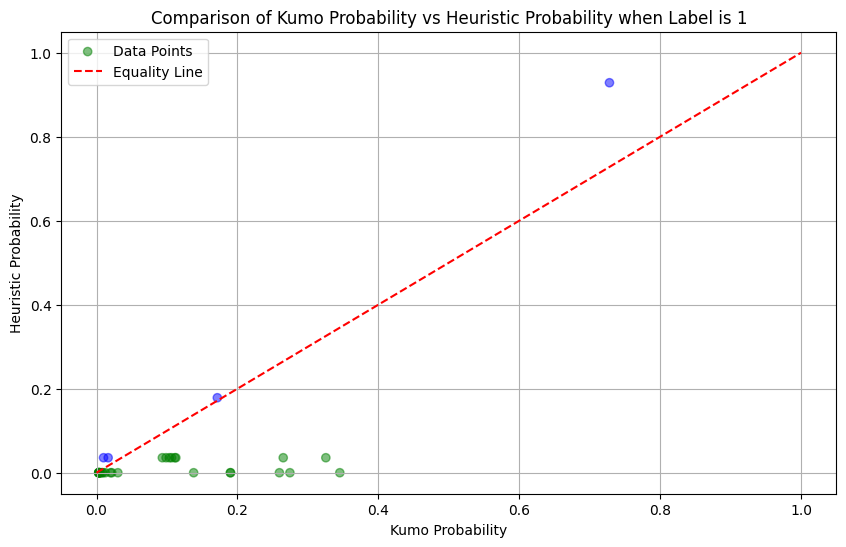

Green dots indicate Kumo is better than Heuristic.
Blue dots indicate Kumo is not better than Heuristic.


In [82]:
#Filter the data where label shows a visit
df_comparison = df_merged[df_merged['label'] == 1]


#Create a new column to indicate if Kumo_prob is better than Heuristic_prob
df_comparison['kumo_better'] = df_comparison['kumo_prob'] > df_comparison['heuristic_prob']


#Plot the comparison
plt.figure(figsize=(10, 6))

#Scatter plot for Kumo_prob vs Heuristic_prob with color indicating if Kumo is better
colors = df_comparison['kumo_better'].map({True: 'green', False: 'blue'})
plt.scatter(df_comparison['kumo_prob'], df_comparison['heuristic_prob'], c=colors, alpha=0.5, label='Data Points')

#Line indicating equality
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Equality Line')

plt.title('Comparison of Kumo Probability vs Heuristic Probability when Label is 1')
plt.xlabel('Kumo Probability')
plt.ylabel('Heuristic Probability')
plt.legend()
plt.grid(True)

# Save the plot as an image file
plt.savefig('comparison_plot.png')

# Display the plot
plt.show()

print('Green dots indicate Kumo is better than Heuristic.')
print('Blue dots indicate Kumo is not better than Heuristic.')

In [ ]:
comparison_plot.png